In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/expanded_traffic_dataset.csv',index_col='Timestamp',parse_dates=True)


In [ ]:
df.head(15)

,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00.000000000,Cloudy,False,803.0
2023-01-01 00:03:16.538728367,Cloudy,False,803.0
2023-01-01 00:06:33.077456734,Cloudy,False,803.0
2023-01-01 00:09:49.616185101,Cloudy,False,803.0
2023-01-01 00:13:06.154913468,Cloudy,False,803.0
2023-01-01 00:16:22.693641835,Cloudy,False,803.0
2023-01-01 00:19:39.232370202,Cloudy,False,803.0
2023-01-01 00:22:55.771098569,Cloudy,False,803.0
2023-01-01 00:26:12.309826936,Cloudy,False,803.0


In [ ]:
df['Weather'].unique()

array(['Cloudy', 'Clear', 'Rain', 'Snow'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160000 entries, 2023-01-01 00:00:00 to 2023-12-30 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Weather         160000 non-null  object 
 1   Events          160000 non-null  bool   
 2   Traffic Volume  160000 non-null  float64
dtypes: bool(1), float64(1), object(1)
memory usage: 3.8+ MB


In [ ]:
w_event=['Clear','Cloudy','Rain','Snow']
e_event=[True,False]
encoder = OrdinalEncoder()
df[['Weather','Events']] = encoder.fit_transform(df[['Weather','Events']])

In [ ]:
df.head(15)

,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00.000000000,1.0,0.0,803.0
2023-01-01 00:03:16.538728367,1.0,0.0,803.0
2023-01-01 00:06:33.077456734,1.0,0.0,803.0
2023-01-01 00:09:49.616185101,1.0,0.0,803.0
2023-01-01 00:13:06.154913468,1.0,0.0,803.0
2023-01-01 00:16:22.693641835,1.0,0.0,803.0
2023-01-01 00:19:39.232370202,1.0,0.0,803.0
2023-01-01 00:22:55.771098569,1.0,0.0,803.0
2023-01-01 00:26:12.309826936,1.0,0.0,803.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160000 entries, 2023-01-01 00:00:00 to 2023-12-30 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Weather         160000 non-null  float64
 1   Events          160000 non-null  float64
 2   Traffic Volume  160000 non-null  float64
dtypes: float64(3)
memory usage: 4.9 MB


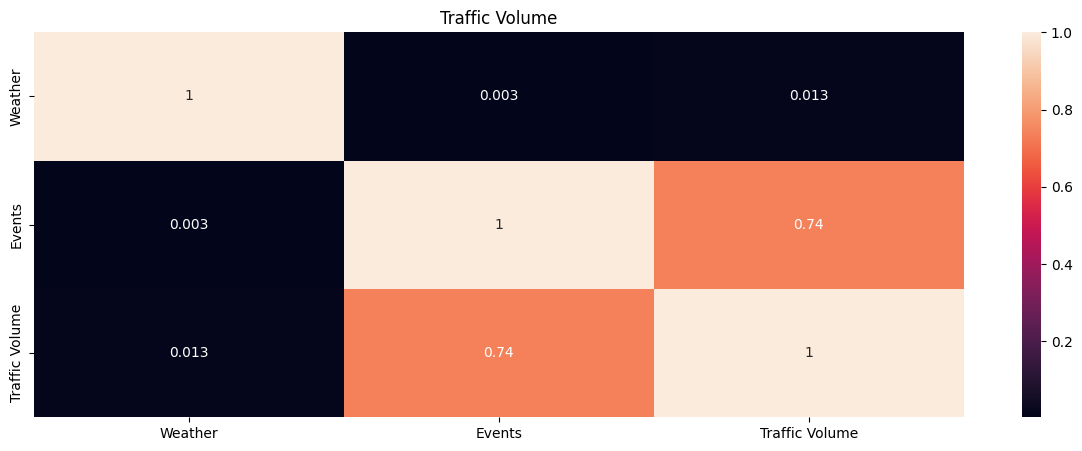

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

plt.title('Traffic Volume')
plt.show()

In [ ]:
df.drop('Weather',axis=1,inplace=True)

In [ ]:
df.head()

,Events,Traffic Volume
Timestamp,,
2023-01-01 00:00:00.000000000,0.0,803.0
2023-01-01 00:03:16.538728367,0.0,803.0
2023-01-01 00:06:33.077456734,0.0,803.0
2023-01-01 00:09:49.616185101,0.0,803.0
2023-01-01 00:13:06.154913468,0.0,803.0


In [ ]:
df.head()

,Events,Traffic Volume
Timestamp,,
2023-01-01 00:00:00.000000000,0.0,803.0
2023-01-01 00:03:16.538728367,0.0,803.0
2023-01-01 00:06:33.077456734,0.0,803.0
2023-01-01 00:09:49.616185101,0.0,803.0
2023-01-01 00:13:06.154913468,0.0,803.0


In [ ]:
X=df.drop('Traffic Volume',axis=1).values
y=df['Traffic Volume'].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled_y=scaler.fit_transform(y)
scaled_data=np.concatenate((X,scaled_y),axis=1)

In [ ]:
scaled_data.shape

(160000, 2)

In [ ]:
scaled_data[0:5]

array([[0.      , 0.107925],
       [0.      , 0.107925],
       [0.      , 0.107925],
       [0.      , 0.107925],
       [0.      , 0.107925]])

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_val = train_test_split(scaled_data, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(test_val, test_size=0.5, shuffle=False)

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array
window_size = 30


train_Xy = timeseries_dataset_from_array(train_data, targets=train_data[window_size:, 1], sequence_length=window_size, batch_size=32)
val_Xy = timeseries_dataset_from_array(val_data, targets=val_data[window_size:, 1], sequence_length=window_size, batch_size=32)
test_Xy = timeseries_dataset_from_array(test_data, targets=test_data[window_size:, 1], sequence_length=window_size, batch_size=32)

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, RepeatVector, TimeDistributed, Dense,SimpleRNN

model_rnn = Sequential()

model_rnn.add(SimpleRNN(32,activation='tanh',return_sequences=True))
model_rnn.add(SimpleRNN(64,activation='tanh',return_sequences=True))
model_rnn.add(SimpleRNN(128,activation='tanh',return_sequences=True))
model_rnn.add(SimpleRNN(64,activation='tanh'))



model_rnn.add(Dense(1, activation='relu'))

model_rnn.compile(optimizer='adam', loss='mse',metrics=['mae'])

model_rnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()

model.add(LSTM(32,activation='tanh',return_sequences=True))
model.add(LSTM(64,activation='tanh'))



model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import GRU

model_g = Sequential()

model_g.add(GRU(32,activation='tanh',return_sequences=True))
model_g.add(GRU(64,activation='tanh'))



model_g.add(Dense(1, activation='relu'))

model_g.compile(optimizer='adam', loss='mse',metrics=['mae'])

model_g.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Assuming X_train_splitted has the shape (number of samples, n_past, 2)
# Assuming y_train_splitted has the correct shape to match the model output

history_rnn=model_rnn.fit(train_Xy, epochs=3, batch_size=32, validation_data=val_Xy, verbose=1)


Epoch 1/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 70s 18ms/step - loss: 0.0447 - mae: 0.1776 - val_loss: 0.0480 - val_mae: 0.1858
Epoch 2/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 72s 18ms/step - loss: 0.0447 - mae: 0.1776 - val_loss: 0.0480 - val_mae: 0.1858
Epoch 3/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 71s 18ms/step - loss: 0.0447 - mae: 0.1776 - val_loss: 0.0480 - val_mae: 0.1858


In [ ]:
# Assuming X_train_splitted has the shape (number of samples, n_past, 2)
# Assuming y_train_splitted has the correct shape to match the model output

history_lstm=model.fit(train_Xy, epochs=3, batch_size=32, validation_data=val_Xy, verbose=1)


Epoch 1/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 0.0011 - mae: 0.0108 - val_loss: 0.0010 - val_mae: 0.0069
Epoch 2/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - loss: 0.0011 - mae: 0.0101 - val_loss: 0.0010 - val_mae: 0.0065
Epoch 3/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - loss: 0.0011 - mae: 0.0097 - val_loss: 0.0010 - val_mae: 0.0072


In [ ]:
history_gru=model_g.fit(train_Xy, epochs=3, batch_size=32, validation_data=val_Xy, verbose=1)


Epoch 1/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0012 - mae: 0.0113 - val_loss: 0.0011 - val_mae: 0.0080
Epoch 2/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0011 - mae: 0.0106 - val_loss: 0.0010 - val_mae: 0.0083
Epoch 3/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0011 - mae: 0.0105 - val_loss: 9.9736e-04 - val_mae: 0.0063


In [ ]:
model_rnn.evaluate(test_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0480 - mae: 0.1829


[0.04442602023482323, 0.17629918456077576]

In [ ]:
model.evaluate(test_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0013 - mae: 0.0082


[0.0011268234811723232, 0.008190092630684376]

In [ ]:
model_g.evaluate(test_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0075


[0.0011479526292532682, 0.007390050683170557]

In [ ]:
rnn_predictions=model_rnn.predict(train_Xy)

4000/4000 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step


In [ ]:
rnn_predictions_val=model_rnn.predict(val_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


In [ ]:
rnn_predictions_test=model_rnn.predict(test_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [ ]:
lstm_predictions=model.predict(train_Xy)
# test_predict=model.predict(test_Xy)

4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step


In [ ]:
lstm_predictions_val=model.predict(val_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:
lstm_predictions_test=model.predict(test_Xy)

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
gru_predictions=model_g.predict(train_Xy)
# test_predict=model.predict(test_Xy)

4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step


In [ ]:
gru_predictions_val=model_g.predict(val_Xy)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
gru_predictions_test=model_g.predict(test_Xy)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
rnn_predictions.mean()

0.0

In [ ]:
rnn_predictions=train_predict_rnn=scaler.inverse_transform(rnn_predictions)
rnn_predictions_val=rnn_predictions_val=scaler.inverse_transform(rnn_predictions_val)
rnn_predictions_test=rnn_predictions_test=scaler.inverse_transform(rnn_predictions_test)

In [ ]:
rnn_predictions.mean()

117.99999

In [ ]:



lstm_predictions=lstm_predictions=scaler.inverse_transform(lstm_predictions)
lstm_predictions_val=lstm_predictions_val=scaler.inverse_transform(lstm_predictions_val)
lstm_predictions_test=lstm_predictions_test=scaler.inverse_transform(lstm_predictions_test)




gru_predictions=gru_predictions=scaler.inverse_transform(gru_predictions)
gru_predictions_val=gru_predictions_val=scaler.inverse_transform(gru_predictions_val)
gru_predictions_test=gru_predictions_test=scaler.inverse_transform(gru_predictions_test)

In [ ]:
lstm_predictions.mean()

1292.0829

In [ ]:
y=scaler.inverse_transform(y)

dict_keys([])

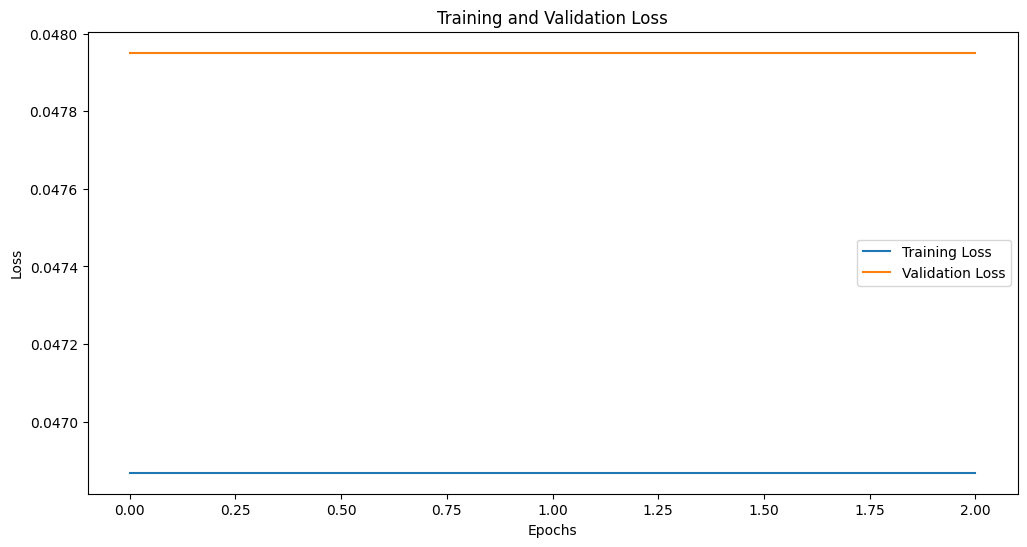

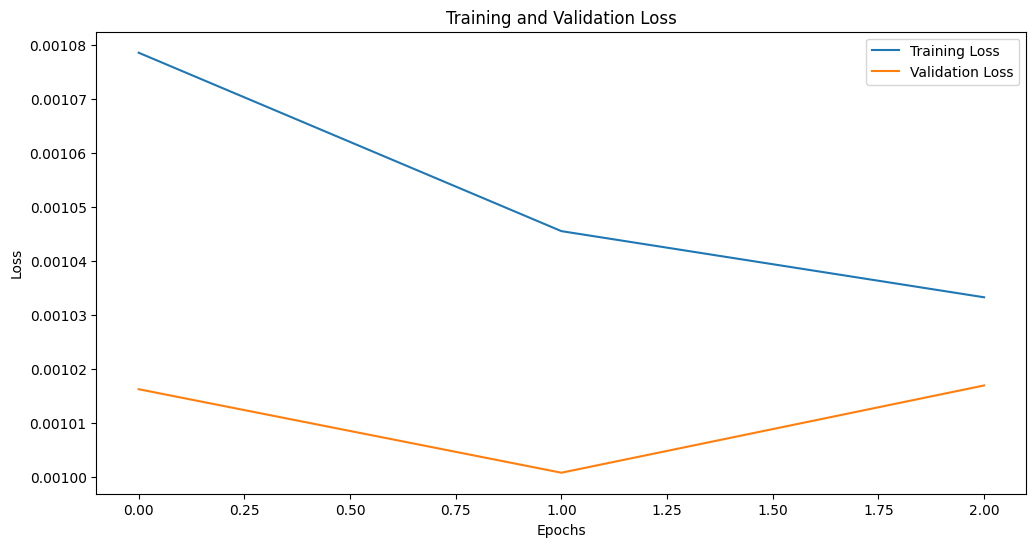

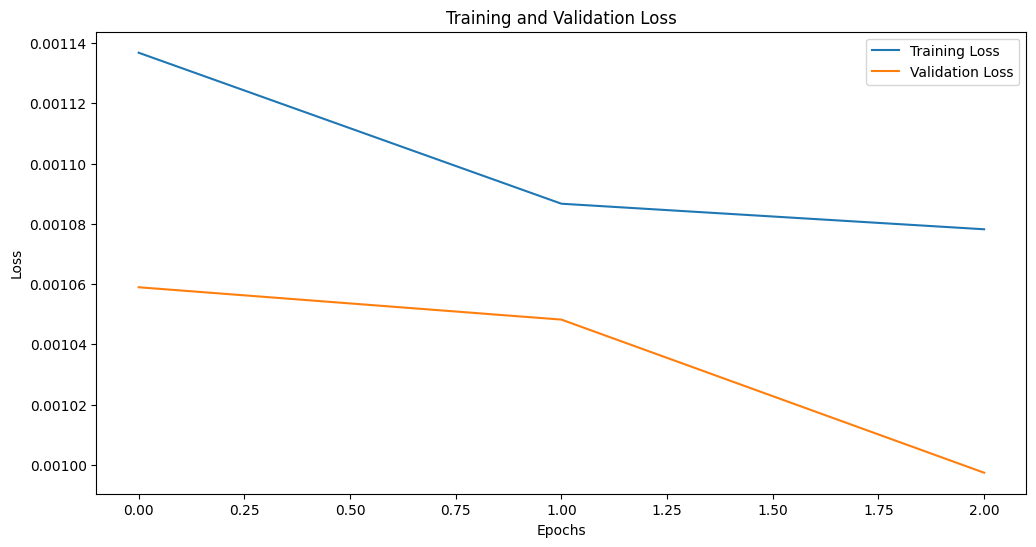

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

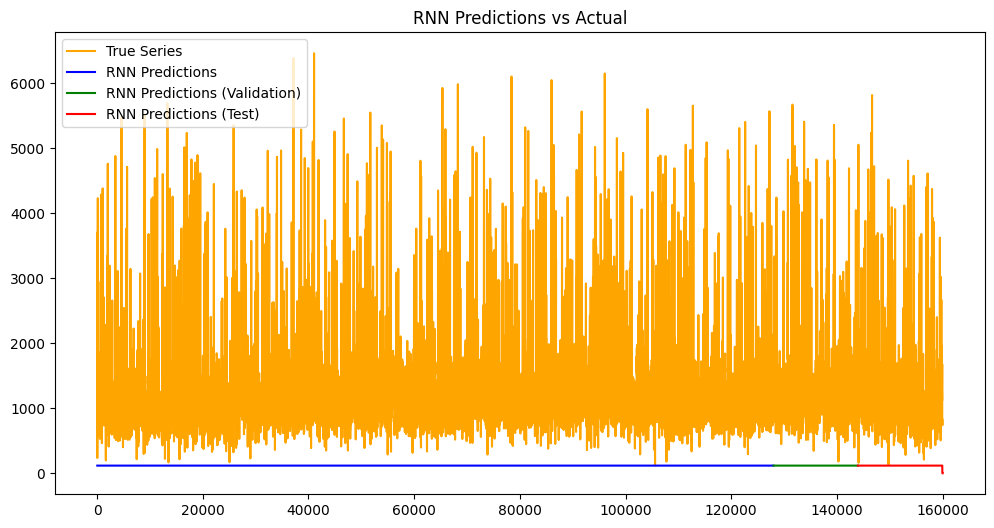

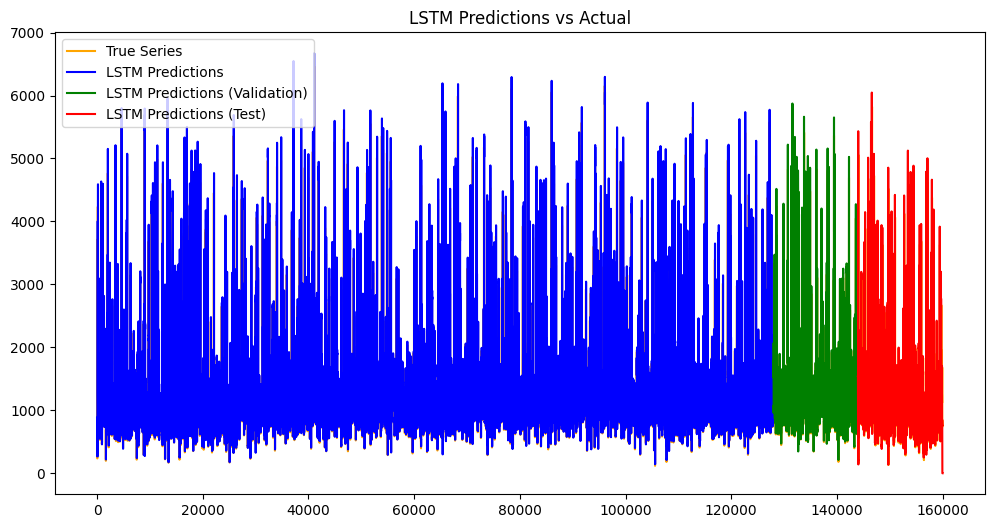

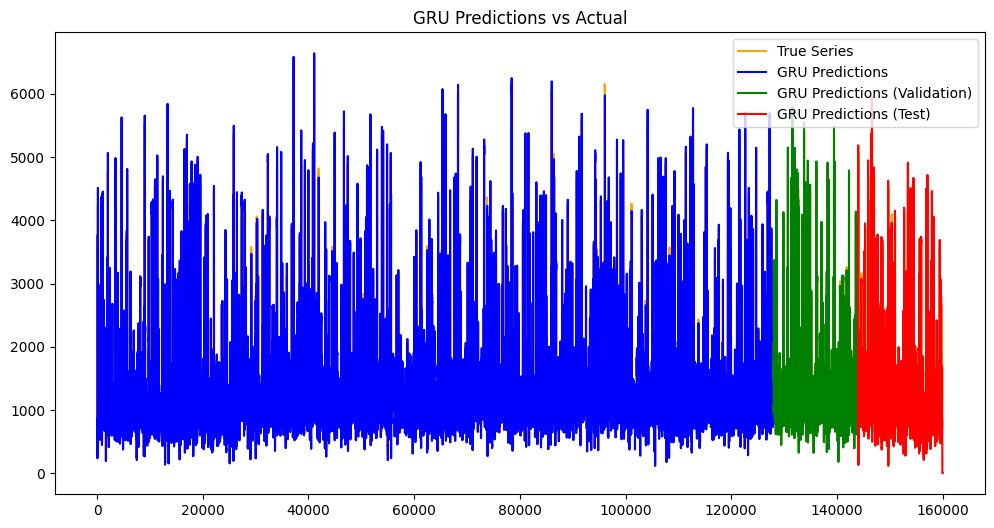

In [ ]:
import matplotlib.pyplot as plt
rnn_arr = np.zeros(len(y))
rnn_arr[:window_size] = np.nan
lstm_arr = np.zeros(len(y))
lstm_arr[:window_size] = np.nan
gru_arr = np.zeros(len(y))
gru_arr[:window_size] = np.nan

#RNN
rnn_arr[window_size:len(rnn_predictions)+window_size] = rnn_predictions.flatten()
rnn_arr[len(rnn_predictions)+window_size:len(rnn_predictions)+len(rnn_predictions_val)+window_size] = rnn_predictions_val.flatten()
rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+window_size:len(rnn_predictions)+len(rnn_predictions_val)+len(rnn_predictions_test)+window_size] = rnn_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(y[window_size:], label='True Series',color='orange')
plt.plot(rnn_arr[:len(rnn_predictions)+window_size], label='RNN Predictions', color='blue') # Plot training predictions in blue
plt.plot(np.arange(len(rnn_predictions)+window_size, len(rnn_predictions)+len(rnn_predictions_val)+window_size),
         rnn_arr[len(rnn_predictions)+window_size:len(rnn_predictions)+len(rnn_predictions_val)+window_size],
         label='RNN Predictions (Validation)', color='green') # Plot validation predictions in green
plt.plot(np.arange(len(rnn_predictions)+len(rnn_predictions_val)+window_size, len(rnn_arr)),
         rnn_arr[len(rnn_predictions)+len(rnn_predictions_val)+window_size:],
         label='RNN Predictions (Test)', color='red') # Plot test predictions in red

plt.legend()
plt.title('RNN Predictions vs Actual')
plt.show()

#LSTM
lstm_arr[window_size:len(lstm_predictions)+window_size] = lstm_predictions.flatten()
lstm_arr[len(lstm_predictions)+window_size:len(lstm_predictions)+len(lstm_predictions_val)+window_size] = lstm_predictions_val.flatten()
lstm_arr[len(lstm_predictions)+len(lstm_predictions_val)+window_size:len(lstm_predictions)+len(lstm_predictions_val)+len(lstm_predictions_test)+window_size] = lstm_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(y[window_size:], label='True Series',color='orange')
plt.plot(lstm_arr[:len(lstm_predictions)+window_size], label='LSTM Predictions', color='blue')
plt.plot(np.arange(len(lstm_predictions)+window_size, len(lstm_predictions)+len(lstm_predictions_val)+window_size),
         lstm_arr[len(lstm_predictions)+window_size:len(lstm_predictions)+len(lstm_predictions_val)+window_size],
         label='LSTM Predictions (Validation)', color='green')
plt.plot(np.arange(len(lstm_predictions)+len(lstm_predictions_val)+window_size, len(lstm_arr)),
         lstm_arr[len(lstm_predictions)+len(lstm_predictions_val)+window_size:],
         label='LSTM Predictions (Test)', color='red')

plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()



gru_arr[window_size:len(gru_predictions)+window_size] = gru_predictions.flatten()
gru_arr[len(gru_predictions)+window_size:len(gru_predictions)+len(gru_predictions_val)+window_size] = gru_predictions_val.flatten()
gru_arr[len(gru_predictions)+len(gru_predictions_val)+window_size:len(gru_predictions)+len(gru_predictions_val)+len(gru_predictions_test)+window_size] = gru_predictions_test.flatten()

plt.figure(figsize=(12, 6))
plt.plot(y[window_size:], label='True Series',color='orange')
plt.plot(gru_arr[:len(gru_predictions)+window_size], label='GRU Predictions', color='blue')
plt.plot(np.arange(len(gru_predictions)+window_size, len(gru_predictions)+len(gru_predictions_val)+window_size),
         gru_arr[len(gru_predictions)+window_size:len(gru_predictions)+len(gru_predictions_val)+window_size],
         label='GRU Predictions (Validation)', color='green')
plt.plot(np.arange(len(gru_predictions)+len(gru_predictions_val)+window_size, len(gru_arr)),
         gru_arr[len(gru_predictions)+len(gru_predictions_val)+window_size:],
         label='GRU Predictions (Test)', color='red')

plt.legend()
plt.title('GRU Predictions vs Actual')
plt.show()